<a href="https://colab.research.google.com/github/Marvin2798/CNN-Project-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Link : https://github.com/ironhack-labs/project-1-deep-learning-image-classification-with-cnn/blob/main/README.md#project-i--deep-learning-image-classification-with-cnn

1. Loading and Data Processing

In [34]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [35]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train
X_test


array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [36]:
# Import to_categorical
from tensorflow.keras.utils import to_categorical  # Import to_categorical

In [37]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [38]:
#datagen = ImageDataGenerator(
 #   rotation_range=15,
  #  width_shift_range=0.1,
   # height_shift_range=0.1,
    #horizontal_flip=True,
#)
#datagen.fit(X_train)

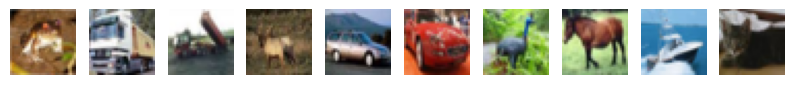

In [39]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()


In [40]:
#

2. Model Architecture

In [41]:
# from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

#from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
#model = Sequential()
#added data augmentation layers
#model.add(RandomFlip("horizontal", input_shape=(32, 32, 3))) # input_shape is specified here
#model.add(RandomRotation(0.2))

# Add convolutional layers and pooling layers
#model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
#model.add(Flatten())

# Add fully connected (dense) layers
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))  # Dropout to avoid overfitting
#model.add(Dense(10, activation='softmax'))  # Output layer (10 classes)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomContrast  # Removed RandomBrightness
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

# Define the model with enhanced data augmentation
model = Sequential()

# Data augmentation layers
model.add(RandomFlip("horizontal", input_shape=(32, 32, 3)))
model.add(RandomRotation(0.2))
model.add(RandomZoom(0.2))
model.add(RandomContrast(0.2))

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fourth Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))


In [43]:
from tensorflow.keras.optimizers import SGD
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    #optimizer='adam',changed the optimizer to sgd to speed up the model training.
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    metrics=['accuracy']
)


In [44]:
# Display the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_5 (RandomR  (None, 32, 32, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 random_contrast_1 (RandomC  (None, 32, 32, 3)         0         
 ontrast)                                                        
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 32)       

3. Model Training

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=25 , batch_size=32,#reduced epoch to 25 from 50 to speed up the training
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/25
1563/1563 [==============================] - 54s 33ms/step - loss: 2.1455 - accuracy: 0.2097 - val_loss: 1.9091 - val_accuracy: 0.3043
Epoch 2/25
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9890 - accuracy: 0.2671 - val_loss: 2.0277 - val_accuracy: 0.2130
Epoch 3/25
1563/1563 [==============================] - 52s 33ms/step - loss: 1.9325 - accuracy: 0.2963 - val_loss: 1.7320 - val_accuracy: 0.3793
Epoch 4/25
1563/1563 [==============================] - 52s 33ms/step - loss: 1.8871 - accuracy: 0.3161 - val_loss: 1.8214 - val_accuracy: 0.3233
Epoch 5/25
1563/1563 [==============================] - 51s 33ms/step - loss: 1.8365 - accuracy: 0.3360 - val_loss: 1.8306 - val_accuracy: 0.2963
Epoch 6/25
1563/1563 [==============================] - 53s 34ms/step - loss: 1.7982 - accuracy: 0.3473 - val_loss: 1.6684 - val_accuracy: 0.4012
Epoch 7/25
1563/1563 [==============================] - 52s 33ms/step - loss: 1.7633 - accuracy: 0.3625 - val_loss: 1.5439 -


  4. Model Evaluation



In [49]:
# Corrected code to fix the model evaluation
val_loss, val_accuracy = model.evaluate(X_test, y_test)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


313/313 [==============================] - 2s 7ms/step - loss: 1.1933 - accuracy: 0.5588
Validation Loss: 1.1933345794677734
Validation Accuracy: 0.5587999820709229


In [50]:
# Evaluate the model on the validation set
#val_loss, val_accuracy = model.evaluate(x_val, y_val)
#print(f'Validation Loss: {val_loss}')
#print(f'Validation Accuracy: {val_accuracy}')



In [52]:
from sklearn.metrics import classification_report

# Predict the labels on the validation set
#y_pred = model.predict(x_val)
#y_pred_classes = y_pred.argmax(axis=1)  # Get the predicted class indices
#y_true = y_val.argmax(axis=1)  # Get the true class indices if one-hot encoded

# Print the classification report
#print(classification_report(y_true, y_pred_classes))


In [53]:
#corrected prediction
from sklearn.metrics import classification_report

# Predict the labels on the validation set
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Get the predicted class indices
y_true = y_test.argmax(axis=1)  # Get the true class indices if one-hot encoded

# Print the classification report
print(classification_report(y_true, y_pred_classes))


313/313 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.67      0.58      0.62      1000
           1       0.69      0.60      0.64      1000
           2       0.69      0.23      0.34      1000
           3       0.44      0.24      0.31      1000
           4       0.52      0.43      0.47      1000
           5       0.72      0.28      0.40      1000
           6       0.38      0.92      0.53      1000
           7       0.66      0.69      0.68      1000
           8       0.62      0.85      0.72      1000
           9       0.58      0.76      0.66      1000

    accuracy                           0.56     10000
   macro avg       0.60      0.56      0.54     10000
weighted avg       0.60      0.56      0.54     10000



In [55]:
#from sklearn.metrics import confusion_matrix
#import seaborn as sns
#import matplotlib.pyplot as plt

# Generate the confusion matrix
#cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title('Confusion Matrix')
#plt.show()

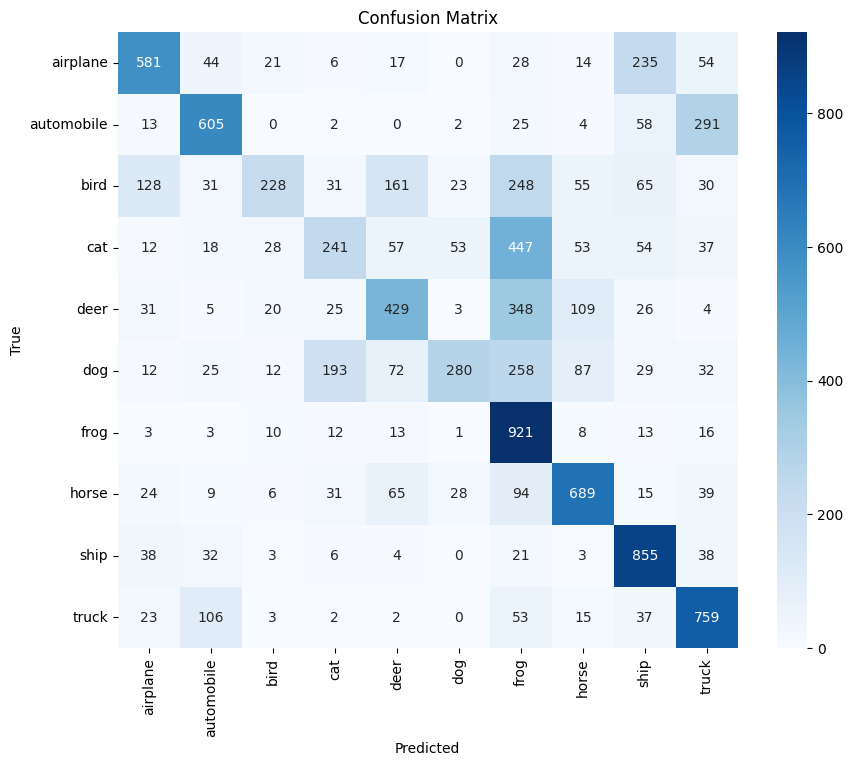

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Transfer Learning

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Load the VGG16 model without the top layers, customized for CIFAR-10 input size
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# new layers added to VGG16 for transfer learning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Final model for transfer learning
transfer_model = Model(inputs=base_model.input, outputs=predictions)

# to freeze the base model layers before compiling to keep their weights fixed
for layer in base_model.layers:
    layer.trainable = False

#compiling the model
transfer_model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Training the transfer learning model
transfer_history = transfer_model.fit(datagen.flow(X_train, y_train, batch_size=32),
                                      validation_data=(X_test, y_test),
                                      epochs=20,
                                      callbacks=[early_stopping])



Epoch 1/20
1563/1563 [==============================] - 75s 47ms/step - loss: 1.9870 - accuracy: 0.2816 - val_loss: 1.6644 - val_accuracy: 0.4320
Epoch 2/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.7267 - accuracy: 0.3885 - val_loss: 1.5457 - val_accuracy: 0.4674
Epoch 3/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.6405 - accuracy: 0.4211 - val_loss: 1.4785 - val_accuracy: 0.4800
Epoch 4/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5968 - accuracy: 0.4353 - val_loss: 1.4280 - val_accuracy: 0.5007
Epoch 5/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5656 - accuracy: 0.4477 - val_loss: 1.3998 - val_accuracy: 0.5091
Epoch 6/20
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5429 - accuracy: 0.4555 - val_loss: 1.3799 - val_accuracy: 0.5186
Epoch 7/20
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5206 - accuracy: 0.4640 - val_loss: 1.3598 -

Fine-tuning to help the model adapt the pre-trained knowledge to ours

In [ ]:
# Unfreeze the last few layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Re-compile the model with a lower learning rate for fine-tuning
transfer_model.compile(optimizer=SGD(learning_rate=1e-5, momentum=0.9),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Continue training the model for fine-tuning
fine_tune_history = transfer_model.fit(datagen.flow(X_train, y_train, batch_size=32),
                                       validation_data=(X_test, y_test),
                                       epochs=10,
                                       callbacks=[early_stopping])


Saving the Trained Model in  the TensorFlow SavedModel format:

In [ ]:
#prep code for deployment to be uncommented as the last step
#next line saves thetransfer learning model in the SavedModel format
##transfer_model.save

##from google.colab import files
##!zip -r my_best_model.zip /content/my_best_model
##files.download('my_best_model.zip')

